In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [61]:
df = pd.read_csv("electricity_bill_dataset.csv")
df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  float64
 2   AirConditioner   45345 non-null  float64
 3   Television       45345 non-null  float64
 4   Monitor          45345 non-null  float64
 5   MotorPump        45345 non-null  int64  
 6   Month            45345 non-null  int64  
 7   City             45345 non-null  object 
 8   Company          45345 non-null  object 
 9   MonthlyHours     45345 non-null  int64  
 10  TariffRate       45345 non-null  float64
 11  ElectricityBill  45345 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 4.2+ MB


In [63]:
df.describe()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,MonthlyHours,TariffRate,ElectricityBill
count,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000,45345.0,45345.000000,45345.000000,45345.000000,45345.000000
mean,13.990694,21.705458,1.503959,12.502635,2.865057,0.0,6.488058,515.083207,8.369648,4311.771307
std,5.470816,1.672575,1.115482,5.756007,3.894933,0.0,3.443252,122.618017,0.576992,1073.886406
min,5.000000,17.000000,0.000000,3.000000,1.000000,0.0,1.000000,95.000000,7.400000,807.500000
25%,9.000000,22.000000,1.000000,7.000000,1.000000,0.0,3.000000,429.000000,7.900000,3556.800000
50%,14.000000,22.000000,2.000000,13.000000,1.000000,0.0,6.000000,515.000000,8.400000,4299.400000
75%,19.000000,23.000000,2.000000,17.000000,1.000000,0.0,9.000000,601.000000,8.900000,5038.800000
max,23.000000,23.000000,3.000000,22.000000,12.000000,0.0,12.000000,926.000000,9.300000,8286.300000


In [64]:
print(df.isnull().sum())

Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64


In [65]:
df["City"] = df["City"].astype('category').cat.codes
df["Company"]= df["Company"].astype('category').cat.codes
df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,5,27,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,15,13,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,14,8,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,7,19,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,7,20,457,9.2,4204.4


In [66]:
POWER_WATTS = {
    'Fan': 75,
    'Refrigerator': 250,
    'AirConditioner': 1500,
    'Television': 120,
    'Monitor': 50,
    'MotorPump': 1000
}

df['EstimatedPowerWatts'] = (
    df['Fan'] * POWER_WATTS['Fan'] +
    df['Refrigerator'] * POWER_WATTS['Refrigerator'] +
    df['AirConditioner'] * POWER_WATTS['AirConditioner'] +
    df['Television'] * POWER_WATTS['Television'] +
    df['Monitor'] * POWER_WATTS['Monitor'] +
    df['MotorPump'] * POWER_WATTS['MotorPump']
)


df['EstimatedEnergyKWh'] = (df['EstimatedPowerWatts'] * df['MonthlyHours']) / 1000
df.drop('EstimatedPowerWatts', axis=1, inplace=True)
df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill,EstimatedEnergyKWh
0,16,23.0,2.0,6.0,1.0,0,10,5,27,384,8.4,3225.6,4116.480
1,19,22.0,2.0,3.0,1.0,0,5,15,13,488,7.8,3806.4,5043.480
2,7,20.0,2.0,6.0,7.0,0,7,14,8,416,7.7,3203.2,3991.520
3,7,22.0,3.0,21.0,1.0,0,6,7,19,475,9.2,4370.0,6220.125
4,11,23.0,2.0,11.0,1.0,0,2,7,20,457,9.2,4204.4,5001.865


In [67]:
df['EstimatedCost'] = df['EstimatedEnergyKWh'] * df['TariffRate']
df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill,EstimatedEnergyKWh,EstimatedCost
0,16,23.0,2.0,6.0,1.0,0,10,5,27,384,8.4,3225.6,4116.480,34578.432
1,19,22.0,2.0,3.0,1.0,0,5,15,13,488,7.8,3806.4,5043.480,39339.144
2,7,20.0,2.0,6.0,7.0,0,7,14,8,416,7.7,3203.2,3991.520,30734.704
3,7,22.0,3.0,21.0,1.0,0,6,7,19,475,9.2,4370.0,6220.125,57225.150
4,11,23.0,2.0,11.0,1.0,0,2,7,20,457,9.2,4204.4,5001.865,46017.158


In [68]:
df['City_Company'] = (df['City'].astype(str) + "_" + df['Company'].astype(str)).astype('category').cat.codes
df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill,EstimatedEnergyKWh,EstimatedCost,City_Company
0,16,23.0,2.0,6.0,1.0,0,10,5,27,384,8.4,3225.6,4116.480,34578.432,372
1,19,22.0,2.0,3.0,1.0,0,5,15,13,488,7.8,3806.4,5043.480,39339.144,197
2,7,20.0,2.0,6.0,7.0,0,7,14,8,416,7.7,3203.2,3991.520,30734.704,190
3,7,22.0,3.0,21.0,1.0,0,6,7,19,475,9.2,4370.0,6220.125,57225.150,427
4,11,23.0,2.0,11.0,1.0,0,2,7,20,457,9.2,4204.4,5001.865,46017.158,429


In [69]:

X = df.drop('ElectricityBill', axis=1)
y = df['ElectricityBill']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

RMSE: 29.831582041187026
R2 score: 0.9992189674776136


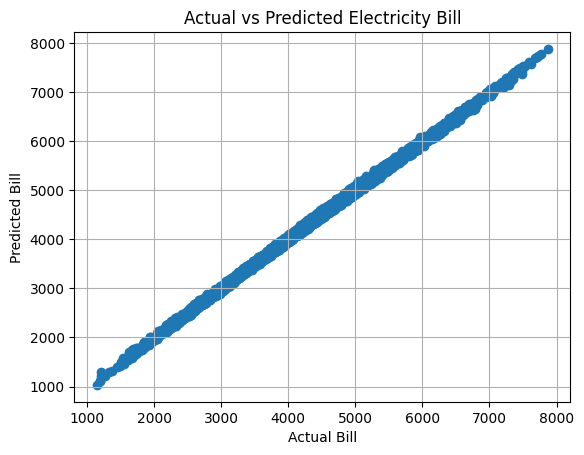

In [71]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 score:", r2)

# Scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Bill")
plt.ylabel("Predicted Bill")
plt.title("Actual vs Predicted Electricity Bill")
plt.grid(True)
plt.show()

In [72]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, pred_rf))
r2_rf = r2_score(y_test, pred_rf)

print("Random Forest ")
print("RMSE :- ",rmse_rf)
print("R2 score :- ",r2_rf)

Random Forest 
RMSE :-  17.78894994707502
R2 score :-  0.9997222735944741


In [73]:
rf.predict([[16,23,2,6,1,0,10,5,27,384,8.4,380,3198,372]])

C:\Users\punee\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([3224.844])